# Predicting Student Admissions

In [1]:
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

## Preliminary Data Exploration


First things first, let's load the data:

In [2]:
df = pd.read_csv("data/student-admissions.csv")

We can have a look at the data and its metrics:

In [3]:
df.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
admit    400 non-null int64
gre      400 non-null int64
gpa      400 non-null float64
rank     400 non-null int64
dtypes: float64(1), int64(3)
memory usage: 12.6 KB


In [5]:
df.describe()

,admit,gre,gpa,rank
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,2.48500
std,0.466087,115.516536,0.380567,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


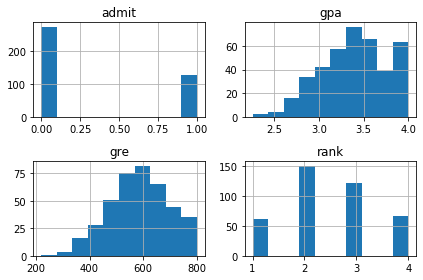

In [6]:
df.hist()
plt.tight_layout() # Avoid axis labels clashing
plt.show()

We see that the dataset contains GRE scores, GPA and rank for 400 different students and their admission (`1`) or rejection (`0`) label.

## Train and Test Sets

Before exploring the data further, let's set aside part of the data to test our model. We can use `scikit-learn` to split the data into a training and validatin set:

In [7]:
train_set, test_set = train_test_split(df, test_size=0.1, random_state=42)

In [8]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 360 entries, 381 to 102
Data columns (total 4 columns):
admit    360 non-null int64
gre      360 non-null int64
gpa      360 non-null float64
rank     360 non-null int64
dtypes: float64(1), int64(3)
memory usage: 14.1 KB


In [9]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 209 to 141
Data columns (total 4 columns):
admit    40 non-null int64
gre      40 non-null int64
gpa      40 non-null float64
rank     40 non-null int64
dtypes: float64(1), int64(3)
memory usage: 1.6 KB


## Data Exploration

We can now have a deeper look at the training set.

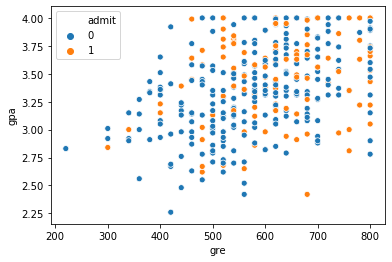

In [10]:
sns.scatterplot(x="gre", y="gpa", hue="admit", data=train_set)
plt.show()

The data does not look very well separated. We can therefore try to incorporate the `rank` variable as well:

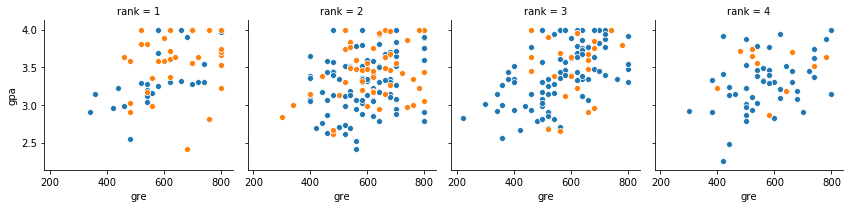

In [11]:
g = sns.FacetGrid(train_set, col="rank", hue="admit",)
g.map(sns.scatterplot, "gre", "gpa")
plt.show()

We see that the number of admission tend to decrease when the rank increases.

## One-Hot Encoding

In [12]:
ranks = train_set[["rank"]] # Use double brackets [[]] to get 2D array
encoder = OneHotEncoder(categories="auto")

ranks_1hot = encoder.fit_transform(ranks)

# One-hot encoded values are stored in a sparse matrix
# toarray() treturns a dense matrix
print(ranks_1hot.toarray())

NameError: name 'ranks_encoded' is not defined